In [2]:
import math
import numpy as np
from matplotlib import pyplot as plt

In [3]:
#### Plot octagon arena ####

In [4]:
### define octagon coordinates

In [23]:
## variables

# basic
num_walls = 8
diameter = 36.21
radius = diameter/2
angle_sep = 2*math.pi/8       # angle between walls
vertex_offset = angle_sep/2

# alcoves
alcove_length_scaled = 3.0
alcove_length_axis_projection = (3*math.sin(math.pi/4))/math.sin(math.pi/2)
print(alcove_length_axis_projection)



2.1213203435596424


In [6]:
## calculate vertex coordinates

# for vertex coordinates: x
vertex_x = []

for i in range(num_walls):
    ang = i*angle_sep
    coord = math.sin(ang + vertex_offset)*radius
    vertex_x.append(coord)
vertex_x.append(vertex_x[0]) # repeat starting point for plotting

# for vertex coordinates: y
vertex_y = []
for i in range(num_walls):
    ang = i*angle_sep
    coord = math.cos(ang + vertex_offset)*radius
    vertex_y.append(coord)
vertex_y.append(vertex_y[0]) # repeat starting point for plotting

In [7]:
## calculate centre-wall coordinates
# Note that this is just a rotation of vertex coordinates by vertex_offset

# for centre-wall coordinates: x
centre_wall_x = []

for i in range(num_walls):
    ang = i*angle_sep
    coord = math.sin(ang)*radius
    centre_wall_x.append(coord)
centre_wall_x.append(centre_wall_x[0]) # repeat starting point for plotting
print(centre_wall_x)

# for centre-wall coordinates: y
centre_wall_y = []
for i in range(num_walls):
    ang = i*angle_sep
    coord = math.cos(ang)*radius
    centre_wall_y.append(coord)
centre_wall_y.append(centre_wall_y[0]) # repeat starting point for plotting

[0.0, 12.802168273382442, 18.105, 12.802168273382444, 2.217223029856283e-15, -12.802168273382442, -18.105, -12.802168273382446, 0.0]


In [8]:
### plot standard octagon

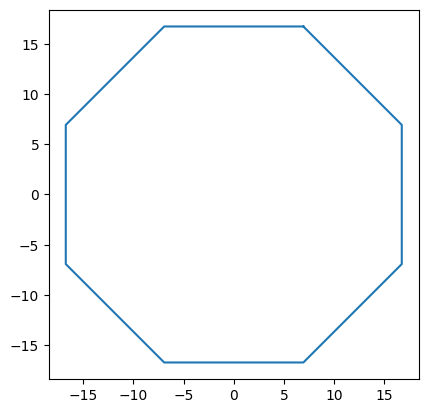

In [28]:
plt.plot(vertex_x, vertex_y)
plt.gca().set_aspect(1.)

In [ ]:
### define octagon coordinates with alcoves

In [10]:
## use linear interpolation to find 1/3 and 2/3 coordinates for each wall (16 points)
vertex_x_one_third = []
vertex_y_one_third = []
for i in range(num_walls):
    vertex_x_one_third.append((2/3)*vertex_x[i] + (1/3)*vertex_x[i+1])
    vertex_y_one_third.append((2/3)*vertex_y[i] + (1/3)*vertex_y[i+1])

vertex_x_two_thirds = []
vertex_y_two_thirds = []
for i in range(num_walls):
    vertex_x_two_thirds.append((1/3)*vertex_x[i] + (2/3)*vertex_x[i+1])
    vertex_y_two_thirds.append((1/3)*vertex_y[i] + (2/3)*vertex_y[i+1])

vertex_x_thirds = vertex_x_one_third + vertex_x_two_thirds
vertex_y_thirds = vertex_y_one_third + vertex_y_two_thirds

# interleave the one-thirds and two-thirds lists
lists_x = [vertex_x_one_third, vertex_x_two_thirds]
vertex_x_thirds = [val for tup in zip(*lists_x) for val in tup] 

# repeat for y
lists_y = [vertex_y_one_third, vertex_y_two_thirds]
vertex_y_thirds = [val for tup in zip(*lists_y) for val in tup] 


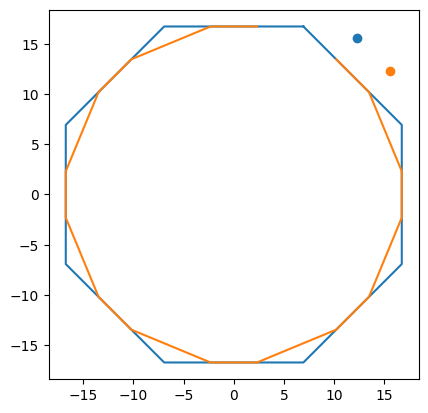

In [26]:
## plot WIP alcove octagon
plt.plot(vertex_x, vertex_y)
plt.plot(vertex_x_thirds, vertex_y_thirds)
plt.scatter(vertex_x_thirds[0]+2.121, vertex_y_thirds[0]+2.121) # sin rule
plt.scatter(vertex_x_thirds[1]+2.121, vertex_y_thirds[1]+2.121)
plt.gca().set_aspect(1.)

In [15]:
vertex_x_thirds

[10.194602007352248,
 13.460720471734547,
 16.726838936116845,
 16.726838936116845,
 13.460720471734547,
 10.194602007352248,
 2.309494514323318,
 -2.3094945143233154,
 -10.194602007352247,
 -13.460720471734543,
 -16.72683893611684,
 -16.72683893611684,
 -13.46072047173455,
 -10.194602007352255,
 -2.309494514323324,
 2.309494514323313]

In [17]:
( vertex_x_thirds[1] - vertex_x_thirds[0])

3.2661184643822985

In [19]:
## calculate gradient of tangent
# first calculate gradient of each wall 
gradients = []
inverse_gradients = []
x_diffs = []
y_diffs =[]

for i in range(0,len(vertex_x_thirds), 2):   # step 2 to iter through walls
    print(i)
    diff_x = vertex_x_thirds[i+1] - vertex_x_thirds[i]
    diff_y = vertex_y_thirds[i+1] - vertex_y_thirds[i]
    x_diffs.append(diff_x)
    y_diffs.append(diff_y)

x_diffs = np.array(x_diffs)
y_diffs = np.array(y_diffs)
print(x_diffs)
print(y_diffs)
gradients = np.zeros(len(x_diffs))
inverse_gradients = np.zeros(len(x_diffs))


# for i in range(len(x_diffs)):
#     gradients.append(y_diffs[i]/x_diffs[i])

gradients = y_diffs/x_diffs
inverse_gradients = -(1/gradients)

print(gradients)
print(inverse_gradients)

## find coordinates that follow the inverse gradients from 1/3 and 2/3 along each line
## for a length equal to 1/3 line
        ## TODO
    

0
2
4
6
8
10
12
14
[ 3.26611846  0.         -3.26611846 -4.61898903 -3.26611846  0.
  3.26611846  4.61898903]
[-3.26611846 -4.61898903 -3.26611846  0.          3.26611846  4.61898903
  3.26611846  0.        ]
[ -1. -inf   1.  -0.  -1.  inf   1.   0.]
[  1.   0.  -1.  inf   1.  -0.  -1. -inf]


/tmp/ipykernel_64471/3009826850.py:26: RuntimeWarning: divide by zero encountered in divide
  gradients = y_diffs/x_diffs
/tmp/ipykernel_64471/3009826850.py:27: RuntimeWarning: divide by zero encountered in divide
  inverse_gradients = -(1/gradients)


In [24]:
inverse_gradients[3]

np.float64(inf)

In [72]:
## generate alcove end-points

alcove_x_coords_diag = []
alcove_x_coords_hori_vert = []
alcove_y_coords_diag = []
alcove_y_coords_hori_vert = []

# scale coordinate values by quadrant signs (going clockwise)
x_axis_quadrant_coeff_diag = [1,1,-1,-1]
y_axis_quadrant_coeff_diag = [1,-1,-1,1]

x_axis_quadrant_coeff_hori_vert = [1,0,-1,0]
y_axis_quadrant_coeff_hori_vert = [0,-1,0,1]

# loop through each diagonal wall and generate coefficient-scaled coordinate values for x and y
for i in range(0,len(vertex_x_thirds),4):  # step by 4 to iter through diagonal walls
    alcove_x_coords_diag.append([vertex_x_thirds[i] + alcove_length_axis_projection*x_axis_quadrant_coeff[int(i/4)], vertex_x_thirds[i+1] + alcove_length_axis_projection*x_axis_quadrant_coeff[int(i/4)]])
    # alcove_x_coords.append(vertex_x_thirds[i+1] + alcove_length_axis_projection*x_axis_quadrant_coeff[int(i/4)])
    
    alcove_y_coords_diag.append([vertex_y_thirds[i] + alcove_length_axis_projection*y_axis_quadrant_coeff[int(i/4)], vertex_y_thirds[i+1] + alcove_length_axis_projection*y_axis_quadrant_coeff[int(i/4)]]) 
    # alcove_y_coords.append(vertex_y_thirds[i+1] + alcove_length_axis_projection*y_axis_quadrant_coeff[int(i/4)])


# loop through each diagonal wall and generate coefficient-scaled coordinate values for x and y
for i in range(2,len(vertex_x_thirds),4):   # step by 4 to iter through horizontal/vertical walls
    x_coordinate_delta = alcove_length_scaled*x_axis_quadrant_coeff_hori_vert[int(i/4)]
    alcove_x_coords_hori_vert.append([vertex_x_thirds[i] + x_coordinate_delta, vertex_x_thirds[i+1] + x_coordinate_delta])

    y_coordinate_delta = alcove_length_scaled*y_axis_quadrant_coeff_hori_vert[int(i/4)]
    alcove_y_coords_hori_vert.append([vertex_y_thirds[i] + y_coordinate_delta, vertex_y_thirds[i+1] + y_coordinate_delta])

# interleave the vertical and horizontal coordinates
x_lists = [alcove_x_coords_diag, alcove_x_coords_hori_vert]
alcove_x_coords = [val for tup in zip(*x_lists) for val in tup]   

y_lists = [alcove_y_coords_diag, alcove_y_coords_hori_vert]
alcove_y_coords = [val for tup in zip(*y_lists) for val in tup]  

In [73]:
alcove_y_coords_diag

[[15.582040815294189, 12.31592235091189],
 [-12.31592235091189, -15.582040815294189],
 [-15.582040815294192, -12.315922350911897],
 [12.315922350911892, 15.582040815294189]]

In [74]:
alcove_x_coords_diag

[[12.31592235091189, 15.582040815294189],
 [15.582040815294189, 12.31592235091189],
 [-12.315922350911888, -15.582040815294185],
 [-15.582040815294192, -12.315922350911897]]

In [75]:
alcove_x_coords_hori_vert

[[19.726838936116845, 19.726838936116845],
 [2.309494514323318, -2.3094945143233154],
 [-19.72683893611684, -19.72683893611684],
 [-2.309494514323324, 2.309494514323313]]

In [76]:
alcove_y_coords_hori_vert

[[2.309494514323318, -2.3094945143233154],
 [-19.726838936116845, -19.726838936116845],
 [-2.3094945143233216, 2.3094945143233163],
 [19.72683893611684, 19.72683893611684]]

In [77]:
alcove_x_coords

[[12.31592235091189, 15.582040815294189],
 [19.726838936116845, 19.726838936116845],
 [15.582040815294189, 12.31592235091189],
 [2.309494514323318, -2.3094945143233154],
 [-12.315922350911888, -15.582040815294185],
 [-19.72683893611684, -19.72683893611684],
 [-15.582040815294192, -12.315922350911897],
 [-2.309494514323324, 2.309494514323313]]

In [78]:
alcove_y_coords

[[15.582040815294189, 12.31592235091189],
 [2.309494514323318, -2.3094945143233154],
 [-12.31592235091189, -15.582040815294189],
 [-19.726838936116845, -19.726838936116845],
 [-15.582040815294192, -12.315922350911897],
 [-2.3094945143233216, 2.3094945143233163],
 [12.315922350911892, 15.582040815294189],
 [19.72683893611684, 19.72683893611684]]

In [79]:
## flatten the interleaved lists

flattened_alcove_x_coords = [val for tup in alcove_x_coords for val in tup]
flattened_alcove_y_coords = [val for tup in alcove_y_coords for val in tup]


In [80]:
len(flattened_alcove_y_coords)

16

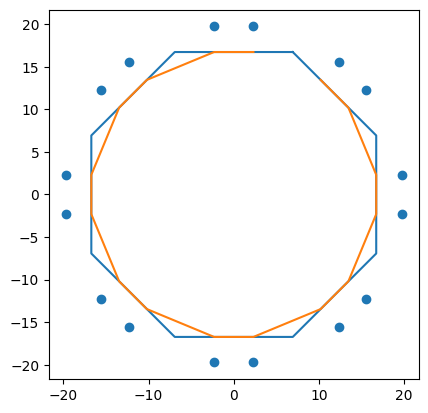

In [81]:
plt.plot(vertex_x, vertex_y)
plt.plot(vertex_x_thirds, vertex_y_thirds)
plt.scatter(alcove_x_coords, alcove_y_coords)
plt.gca().set_aspect(1.)

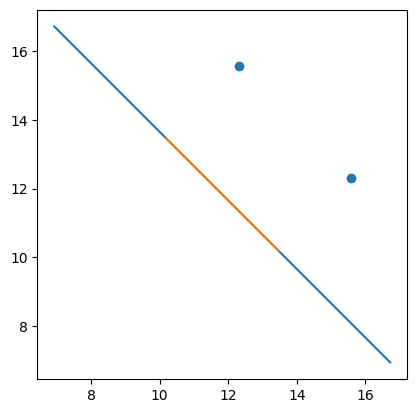

In [101]:
plt.plot(vertex_x[0:2], vertex_y[0:2])
plt.plot(vertex_x_thirds[0:2], vertex_y_thirds[0:2])
plt.scatter(alcove_x_coords[0:1], alcove_y_coords[0:1])
plt.gca().set_aspect(1.)

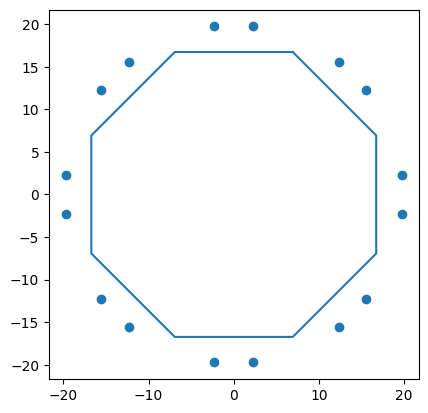

In [83]:
plt.plot(vertex_x, vertex_y)
# plt.plot(vertex_x_thirds, vertex_y_thirds)
plt.scatter(flattened_alcove_x_coords, flattened_alcove_y_coords)
plt.gca().set_aspect(1.)

In [114]:
# concatenate all of the coordinate lists together in order

final_x_coords = []
i,j,k = 0,0,0

while i < len(vertex_x) and j < len(vertex_x_thirds) and k < len(flattened_alcove_x_coords):
    final_x_coords.append(vertex_x[i])
    i+=1

    final_x_coords.append(vertex_x_thirds[j])
    j+=1

    final_x_coords.extend(flattened_alcove_x_coords[k:k+2])
    k+=2

    final_x_coords.append(vertex_x_thirds[j])
    j+=1

final_x_coords.append(vertex_x[0])

final_y_coords = []
i,j,k = 0,0,0

while i < len(vertex_y) and j < len(vertex_y_thirds) and k < len(flattened_alcove_y_coords):
    final_y_coords.append(vertex_y[i])
    i+=1

    final_y_coords.append(vertex_y_thirds[j])
    j+=1

    final_y_coords.extend(flattened_alcove_y_coords[k:k+2])
    k+=2

    final_y_coords.append(vertex_y_thirds[j])
    j+=1

final_y_coords.append(vertex_y[0])

    

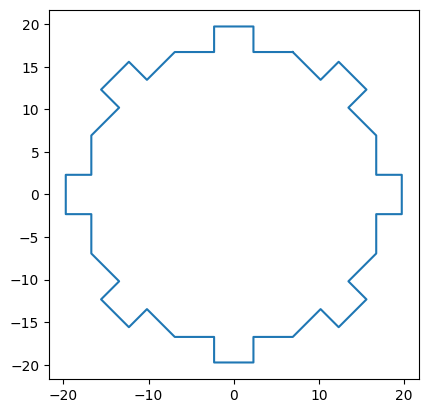

In [115]:
plt.plot(final_x_coords, final_y_coords)
plt.gca().set_aspect(1.)